## WeatherPy: Visualizing weather based on Latitude  
March 2, 2019  
Scott McEachern

In [12]:
#-- Import Libraries
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import datetime

# OpenWeatherMap API Key located in secrets.py; .gitignore prevents secrets.py from push to GitHub
from secrets import api_key

# citipy library to lookup city name based on lat/long; 
# require installation of dependencies with: pip install citipy
from citipy import citipy


In [35]:
#-- Generate List of Cities

# Number of random locations to calculate
numRandomLocations = 4000

# Total number of cities to get weather information from API
numCities = 1000


#- Create Random Coordinates
lats = np.random.uniform(low=-90.000, high=90.000, size=numRandomLocations)
lngs = np.random.uniform(low=-180.000, high=180.000, size=numRandomLocations)


#- Merge into Zip
lat_lngs = zip(lats, lngs)


#- Find City Name
cityNames = []

for lat_lng in lat_lngs:
    
    # Get nearest city
    cityName = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # Determine new city name
    if (cityName not in cityNames):
        cityNames.append(cityName)

        # Check if reached number of cities used with analysis
        if (len(cityNames) == numCities):
            break

            
#- Information on cities
print(f'Created list of city names; total {len(cityNames)}')

Created list of city names; total 1000


In [3]:
def getWeatherForCity(cityName):
    ''' Queries the OpenWeatherData API to get the current weather conditions for the city name provided.
    Exceptions are captured and when exception, metadata printed to console.
    
    Accepts : cityName (str) Name of the city to search to get current weather information for
    
    Returns : List - contains metadata from the API; returns None when exception or not 200 response
                0 - (str) City Name
                1 - (str) Country Code
                2 - (num) Latitude
                3 - (num) Longitude
                4 - (num) Max Temperature - F
                5 - (num) Windspeed - MPH
                6 - (num) Humidity - %
                7 - (num) Cloudiness - %
    '''
    
    try:
        
        #- Prepare URL
        baseWeatherUrl = "http://api.openweathermap.org/data/2.5/weather"
        unitFormat = "imperial"
        
        queryUrl = f"{baseWeatherUrl}?q={cityName}&units={unitFormat}&appid={api_key}"
        
        
        #- Get Weather from API
        response = requests.get(queryUrl)
        
        
        #- Check Response
        cityWeather = []
        
        if (response.status_code == requests.codes.ok):
            
            # Get Json from Response
            responseJson = response.json()
            
            
            # Get Weather Information
            cityWeather.append(responseJson['name'])
            cityWeather.append(responseJson['sys']['country'])
            
            cityWeather.append(responseJson['coord']['lat'])
            cityWeather.append(responseJson['coord']['lon'])
            
            cityWeather.append(responseJson['main']['temp_max'])
            cityWeather.append(responseJson['wind']['speed'])
            
            cityWeather.append(responseJson['main']['humidity'])
            cityWeather.append(responseJson['clouds']['all'])
        
        else:
            #- Response not valid; return None
            return
        
        
        return cityWeather
        
    except Exception as e:
        print(f"   Exception getting weather from API. City: {cityName} Error Type: {type(e)} Info: {e}")

In [36]:
##- Get Weather for City

#- Prepare Dictionary to store results
weatherData = {
    'City': [],
    'Country': [],
    'Latitude' : [],
    'Longitude' : [],
    'Temperature' : [],
    'WindSpeed' : [],
    'Humidity' : [],
    'Cloudiness': [],
    }


#- Display Message
print("> Start data retrieval")


#- Get Weather Information
errorCounter = 0
counter = 0

for cityName in cityNames:
    
    # Progress Message
    counter += 1
    
    print(f"Processing: {counter} of {len(cityNames)} - {cityName.title()}")
    
    
    # Get Weather for City
    cityInfo = getWeatherForCity(cityName)
    
    
    # Check Results from API
    if (cityInfo != None):
        weatherData['City'].append(cityInfo[0])
        weatherData['Country'].append(cityInfo[1])
        weatherData['Latitude'].append(cityInfo[2])
        weatherData['Longitude'].append(cityInfo[3])
        weatherData['Temperature'].append(cityInfo[4])
        weatherData['WindSpeed'].append(cityInfo[5])
        weatherData['Humidity'].append(cityInfo[6])
        weatherData['Cloudiness'].append(cityInfo[7])
        
    else:
        print(f"   Unable to get weather information for city: {cityName.title()}")
        errorCounter +=1
    
    
#- Display Message
print(" ")
print(f"Completed getting data. Total Cities: {len(weatherData['City'])}  Error Cities: {errorCounter}")
  

> Start data retrieval
Processing: 1 of 1000 - Asau
   Unable to get weather information for city: Asau
Processing: 2 of 1000 - Kapaa
Processing: 3 of 1000 - Busselton
Processing: 4 of 1000 - Tabas
Processing: 5 of 1000 - Teeli
Processing: 6 of 1000 - Vaitape
Processing: 7 of 1000 - Flin Flon
Processing: 8 of 1000 - Illoqqortoormiut
   Unable to get weather information for city: Illoqqortoormiut
Processing: 9 of 1000 - Hobart
Processing: 10 of 1000 - Ushuaia
Processing: 11 of 1000 - Avarua
Processing: 12 of 1000 - Puerto Ayora
Processing: 13 of 1000 - Otavalo
Processing: 14 of 1000 - Labutta
   Unable to get weather information for city: Labutta
Processing: 15 of 1000 - Taltal
Processing: 16 of 1000 - Arraial Do Cabo
Processing: 17 of 1000 - Vila Velha
Processing: 18 of 1000 - Saskylakh
Processing: 19 of 1000 - Taolanaro
   Unable to get weather information for city: Taolanaro
Processing: 20 of 1000 - New Norfolk
Processing: 21 of 1000 - East London
Processing: 22 of 1000 - Nadvoitsy
P

Processing: 206 of 1000 - San Jose
Processing: 207 of 1000 - Pula
Processing: 208 of 1000 - Tornio
Processing: 209 of 1000 - Kodiak
Processing: 210 of 1000 - Husavik
Processing: 211 of 1000 - Puerto Escondido
Processing: 212 of 1000 - Warqla
   Unable to get weather information for city: Warqla
Processing: 213 of 1000 - Dicabisagan
Processing: 214 of 1000 - Barabai
Processing: 215 of 1000 - Roald
Processing: 216 of 1000 - Rovaniemi
Processing: 217 of 1000 - Aswan
Processing: 218 of 1000 - Myrhorod
Processing: 219 of 1000 - Northam
Processing: 220 of 1000 - Khatanga
Processing: 221 of 1000 - Nanortalik
Processing: 222 of 1000 - Constitucion
Processing: 223 of 1000 - Lyubim
Processing: 224 of 1000 - Chalus
Processing: 225 of 1000 - Vila Do Maio
Processing: 226 of 1000 - Faanui
Processing: 227 of 1000 - Dhidhdhoo
Processing: 228 of 1000 - Ashland
Processing: 229 of 1000 - Chapais
Processing: 230 of 1000 - Saldanha
Processing: 231 of 1000 - Pacific Grove
Processing: 232 of 1000 - Sao Filip

Processing: 409 of 1000 - Zonguldak
Processing: 410 of 1000 - Port Macquarie
Processing: 411 of 1000 - Adeje
Processing: 412 of 1000 - Wladyslawowo
Processing: 413 of 1000 - Kalengwa
Processing: 414 of 1000 - Yangambi
Processing: 415 of 1000 - Fairbanks
Processing: 416 of 1000 - Kodinar
Processing: 417 of 1000 - Kudahuvadhoo
Processing: 418 of 1000 - Marawi
Processing: 419 of 1000 - Clonakilty
Processing: 420 of 1000 - Ravar
Processing: 421 of 1000 - Haapu
   Unable to get weather information for city: Haapu
Processing: 422 of 1000 - Dorado
Processing: 423 of 1000 - Yuzhno-Sukhokumsk
Processing: 424 of 1000 - Carbonia
Processing: 425 of 1000 - Tommot
Processing: 426 of 1000 - Manavgat
Processing: 427 of 1000 - Gat
Processing: 428 of 1000 - General Roca
Processing: 429 of 1000 - Umm Lajj
Processing: 430 of 1000 - Malindi
Processing: 431 of 1000 - Orlik
Processing: 432 of 1000 - Waitara
Processing: 433 of 1000 - Ilorin
Processing: 434 of 1000 - Soledad
Processing: 435 of 1000 - Butembo
P

Processing: 615 of 1000 - Plettenberg Bay
Processing: 616 of 1000 - Obihiro
Processing: 617 of 1000 - Usevya
   Unable to get weather information for city: Usevya
Processing: 618 of 1000 - Ushibuka
Processing: 619 of 1000 - Boende
Processing: 620 of 1000 - Honningsvag
Processing: 621 of 1000 - Cockburn Harbour
   Unable to get weather information for city: Cockburn Harbour
Processing: 622 of 1000 - Chokurdakh
Processing: 623 of 1000 - Shu
Processing: 624 of 1000 - Kattivakkam
Processing: 625 of 1000 - Sokolo
Processing: 626 of 1000 - Sobolevo
Processing: 627 of 1000 - Rorvik
Processing: 628 of 1000 - Tecoanapa
Processing: 629 of 1000 - Sendafa
Processing: 630 of 1000 - Ambam
Processing: 631 of 1000 - Nemuro
Processing: 632 of 1000 - Severnoye
Processing: 633 of 1000 - Dakar
Processing: 634 of 1000 - Veraval
Processing: 635 of 1000 - Reo
Processing: 636 of 1000 - Shache
Processing: 637 of 1000 - La Libertad
Processing: 638 of 1000 - Hvammstangi
   Unable to get weather information for c

Processing: 816 of 1000 - Bereda
Processing: 817 of 1000 - Sangar
Processing: 818 of 1000 - Guasdualito
Processing: 819 of 1000 - Dera Din Panah
   Unable to get weather information for city: Dera Din Panah
Processing: 820 of 1000 - Urumqi
   Unable to get weather information for city: Urumqi
Processing: 821 of 1000 - Sansai
   Unable to get weather information for city: Sansai
Processing: 822 of 1000 - Kiunga
Processing: 823 of 1000 - Fort-Shevchenko
Processing: 824 of 1000 - Port Lincoln
Processing: 825 of 1000 - Karaton
Processing: 826 of 1000 - Gabu
Processing: 827 of 1000 - Road Town
Processing: 828 of 1000 - Tanete
Processing: 829 of 1000 - Safaga
   Unable to get weather information for city: Safaga
Processing: 830 of 1000 - Khonuu
   Unable to get weather information for city: Khonuu
Processing: 831 of 1000 - Lexington
Processing: 832 of 1000 - Shingu
Processing: 833 of 1000 - Barreirinhas
Processing: 834 of 1000 - Punta Alta
Processing: 835 of 1000 - Wainwright
Processing: 836

In [37]:
#-- Prepare Data For Charting

#- Create Data Frame
weather_df = pd.DataFrame(weatherData)


#- Export to csv
exportDataPath = os.path.join(".", "Output", "WeatherData.cvs")

weather_df.to_csv(exportDataPath, encoding='utf-8', index=False)


#- Preview Dataframe
weather_df.head()

,City,Country,Latitude,Longitude,Temperature,WindSpeed,Humidity,Cloudiness
0,Kapaa,US,22.08,-159.32,68.00,8.05,72,75
1,Busselton,AU,-33.64,115.35,68.00,21.50,39,0
2,Tabas,IR,33.60,56.92,43.86,5.95,29,0
3,Teeli,RU,51.01,90.20,-0.60,0.58,53,8
4,Vaitape,PF,-16.52,-151.75,82.83,5.06,100,44


In [21]:
#-- Create Date for Plots
dateInfo = datetime.datetime.now().strftime("%B %-d, %Y")

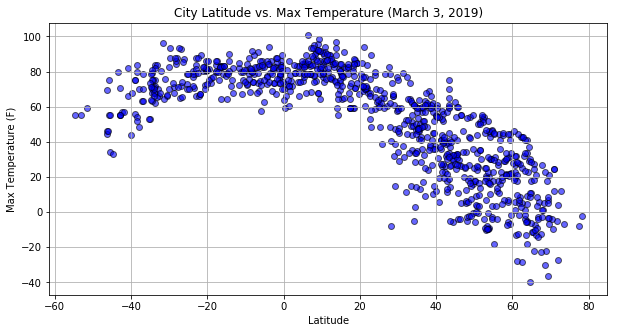

In [40]:
#-- Plot Latitude vs Temperature

#- Create Plot
plt.figure(figsize = (10, 5))

plt.scatter(weather_df['Latitude'], weather_df['Temperature'], marker='o', 
            facecolors='blue', edgecolors='black', alpha= .6)


#- Set Chart Metadata
plt.title(f'City Latitude vs. Max Temperature ({dateInfo})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()


#- Save Chart
temperatureImagePath = os.path.join(".", "Output", "LatitudeAndMaxTemperature.png")

plt.savefig(temperatureImagePath)


#- Show Chart
plt.show()

In [20]:
print(datetime.datetime.now().strftime("%B %-d, %Y"))

March 3, 2019
